## Project 7 - Sentiment Analysis

### **Assignment**  
Pick one of the company data files and build your own classifier. 

When you're satisfied with its performance (at this point just using the accuracy measure shown in the example):  
test it on one of the other datasets to see how well these kinds of classifiers translate from one context to another.

Include your model and a brief writeup of your feature engineering and selection process to submit and review with your mentor.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_colwidth = 100
plt.rcParams['figure.figsize'] = [20, 16]

In [3]:
def get_file_encoding(fn):
    import chardet
        
    with open(fn, 'rb') as f:
        content = f.read()

    charset = chardet.detect(content)
    # {'encoding': 'EUC-JP', 'confidence': 0.99}
    #print("character set = {}".format(charset['encoding']))
    
    return charset['encoding']

In [4]:
# Let's process the data)
def open_and_load_file (filename, columnnames):
    file_encoding = get_file_encoding(filename)
    df = pd.read_csv(filename, delimiter= '\t', header=None, encoding=file_encoding) 
    df.columns = columnnames
    return df, file_encoding

In [5]:
def run_Bernoulli_supervised_learning(d1, t1):
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
    from sklearn.naive_bayes import BernoulliNB

    # Instantiate our model and store it in a new variable.
    bnb = BernoulliNB()

    # Fit our model to the data.
    bnb.fit(d1, target)

    # Classify, storing the result in a new variable.
    y_pred = bnb.predict(d1)

    # Display our results.
    return_message = "Number of mislabeled points out of a total {} points : {}".format(
        d1.shape[0],
        (t1 != y_pred).sum()
    )

    return (return_message, d1.shape[0], (t1 != y_pred).sum(), (t1 != y_pred).sum()/d1.shape[0] )

In [6]:
keywords = ['blah', 'disgusted','fucking','dirt','avoid', 'mediocre,','elsewhere','wonderful','awesome','sucked',
            'shocked','disgraceful','awkward','not return','horrible','below average','bland','disgust','generous',
            'ample','huge','winner','definitely','reasonable', 'not good', 'awful','tender','quickly','awesome',
            'delicious','amazing','worth','phenomenal','helpful','good','fantastic','fresh','recommended', 
            'beautiful', 'outstanding', 'great','teamwork','enjoyed','inexpensive','fav','loved','approval',
            'delightful','flavorful','good','tasty','delight','beautiful','performed','amazing','cute','friendly',
            'BARGAIN', 'unreal','great','prompt','highly recommended','jewel', 'love', 'is worth', 'sticks around',
            'loved', 'hit']

In [7]:
def do_the_keywords():
    for key in keywords:
        # Add spaces around the key so that we are getting theword,
        # not just pattern matching
        sentiment_raw[str(key)] = sentiment_raw.message.str.contains(' ' + str(key) + ' ', case=False)

In [8]:
def do_the_heatmap(subplotno):
    plt.subplot(3,1,subplotno) 
    sns.heatmap(sentiment_raw.corr(), cmap="Blues")

In [9]:
def set_data_and_target():
    global data 
    data = sentiment_raw[keywords]
    # data.sample(5)
    
    global target 
    target = sentiment_raw['sentiment']
    # target.head(10)

In [10]:
file_list = ['amazon_cells_labelled.txt', 'imdb_labelled.txt', 'yelp_labelled.txt']
file_path = "../../../Datafiles/sentiment_labelled_sentences/"

#### main

Now processing file amazon_cells_labelled.txt
y=1000, z=414, and this model was correct 41.40% percent of the time
Now processing file imdb_labelled.txt
y=748, z=305, and this model was correct 40.78% percent of the time
Now processing file yelp_labelled.txt
y=1000, z=353, and this model was correct 35.30% percent of the time
That's all folks!!!


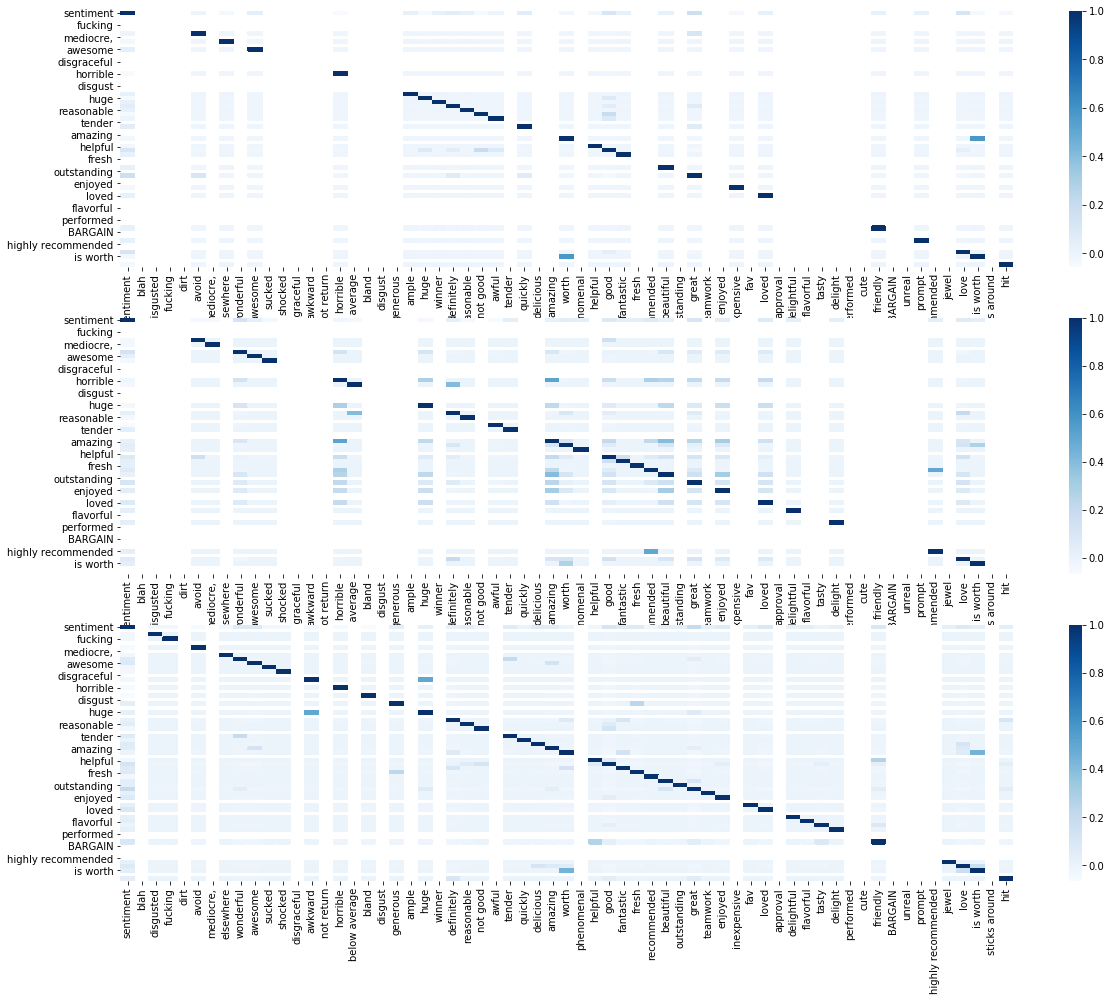

In [11]:
subplotnum = 1
for filenom in file_list:
    print("Now processing file {}".format(filenom))
    sentiment_raw, encod = open_and_load_file(file_path + filenom , ['message', 'sentiment'])
    do_the_keywords()
    do_the_heatmap(subplotnum)
    set_data_and_target()
    xmsg, y, z, z2 = run_Bernoulli_supervised_learning(data, target)
    print("y={0}, z={1}, and this model was correct {2:.2f}% percent of the time".format(y, z, z/y*100, z2*100))
    subplotnum += 1
print("That's all folks!!!")

In [12]:
# for index, row in data.iterrows():
#     print(row['c1'], row['c2'])
# print(target)
# dfs = [target, data]
# df_final = reduce(lambda left,right: pd.merge(left,right,on='name'), dfs)
# df.merge(s.rename('new'), left_index=True, right_index=True)
# df = 
# print(data)
df = data
df.merge(target.rename('target'), left_index=True, right_index=True)

len(df)
# for index, row in df.iterrows():
#     print(row['c1'], row['c2'])
     
for i, row in df.iterrows():
    for j, column in row.iteritems():
#         print(column)
          if (column == True):
            row_value=True

In [13]:
arr = df.values
index_names = df.index
col_names = df.columns
print(col_names)
#  Get indices where such threshold is crossed; avoid diagonal elems
R,C = np.where(np.triu(arr,1)==True)

# Arrange those in columns and put out as a dataframe
out_arr = np.column_stack((index_names[R],col_names[C],arr[R,C]))
df_out = pd.DataFrame(out_arr,columns=[['row_name','col_name','value']])

Index(['blah', 'disgusted', 'fucking', 'dirt', 'avoid', 'mediocre,',
       'elsewhere', 'wonderful', 'awesome', 'sucked', 'shocked', 'disgraceful',
       'awkward', 'not return', 'horrible', 'below average', 'bland',
       'disgust', 'generous', 'ample', 'huge', 'winner', 'definitely',
       'reasonable', 'not good', 'awful', 'tender', 'quickly', 'awesome',
       'delicious', 'amazing', 'worth', 'phenomenal', 'helpful', 'good',
       'fantastic', 'fresh', 'recommended', 'beautiful', 'outstanding',
       'great', 'teamwork', 'enjoyed', 'inexpensive', 'fav', 'loved',
       'approval', 'delightful', 'flavorful', 'good', 'tasty', 'delight',
       'beautiful', 'performed', 'amazing', 'cute', 'friendly', 'BARGAIN',
       'unreal', 'great', 'prompt', 'highly recommended', 'jewel', 'love',
       'is worth', 'sticks around', 'loved', 'hit'],
      dtype='object')


In [14]:
print(df_out)

   row_name  col_name value
0         0     loved  True
1         0     loved  True
2         2     tasty  True
3         3     loved  True
4         3     loved  True
5         4     great  True
6         4     great  True
7         8     great  True
8         8     great  True
9         9     great  True
10        9     great  True
11       18     worth  True
12       27     great  True
13       27  friendly  True
14       27     great  True
15       33      good  True
16       33      good  True
17       36      good  True
18       41      good  True
19       42      good  True
20       43     great  True
21       47      good  True
22       55     great  True
